<a href="https://colab.research.google.com/github/su-dipta/python_basics/blob/main/contour_nd_metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

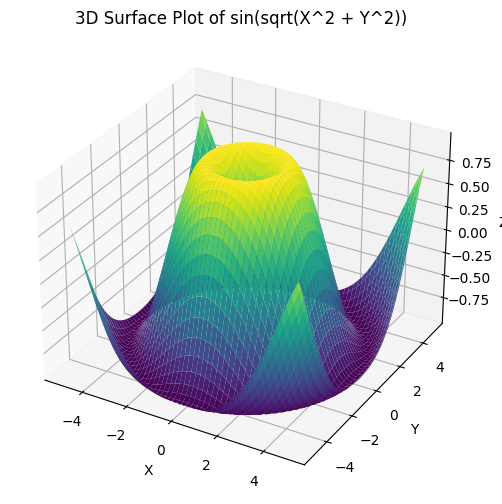

In [5]:
# Generate 3D grid and calculate function values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('3D Surface Plot of sin(sqrt(X^2 + Y^2))')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

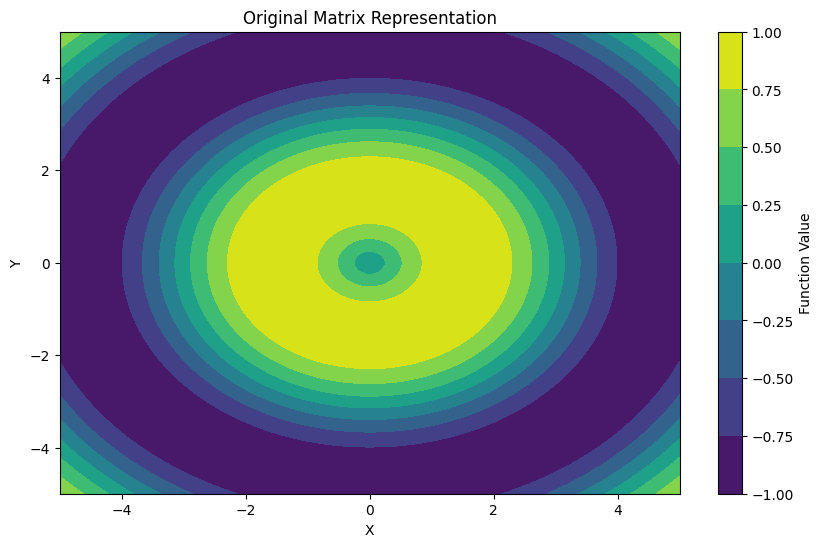

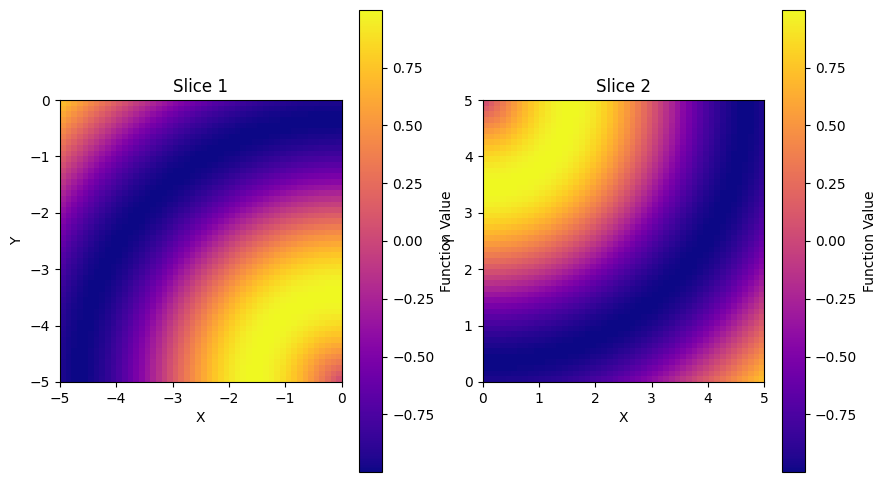

In [3]:
# Generate a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))  # Example function for the grid

# Plot the original matrix
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')
plt.title('Original Matrix Representation')
plt.xlabel('X')
plt.ylabel('Y')

# Perform matrix slicing to extract specific regions
slice1 = Z[:50, :50]  # Slice the top-left quarter of the matrix
slice2 = Z[50:, 50:]  # Slice the bottom-right quarter of the matrix

# Apply linear algebra operations (e.g., matrix multiplication)
A = np.array([[1, 2], [3, 4]])  # Example matrix for multiplication
B = np.array([[5, 6], [7, 8]])

result_matrix = np.dot(A, B)  # Matrix multiplication
eigenvalues, _ = np.linalg.eig(result_matrix)  # Calculate eigenvalues

# Plot the sliced regions
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(slice1, cmap='plasma', extent=(-5, 0, -5, 0))
plt.colorbar(label='Function Value')
plt.title('Slice 1')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.imshow(slice2, cmap='plasma', extent=(0, 5, 0, 5))
plt.colorbar(label='Function Value')
plt.title('Slice 2')
plt.xlabel('X')
plt.ylabel('Y')

"""# Show the matrices and eigenvalues
print("Original Matrix:")
print(Z)
print("\nSlice 1:")
print(slice1)
print("\nSlice 2:")
print(slice2)
print("\nResult Matrix (after multiplication):")
print(result_matrix)
print("\nEigenvalues of Result Matrix:")
print(eigenvalues)"""

plt.show()

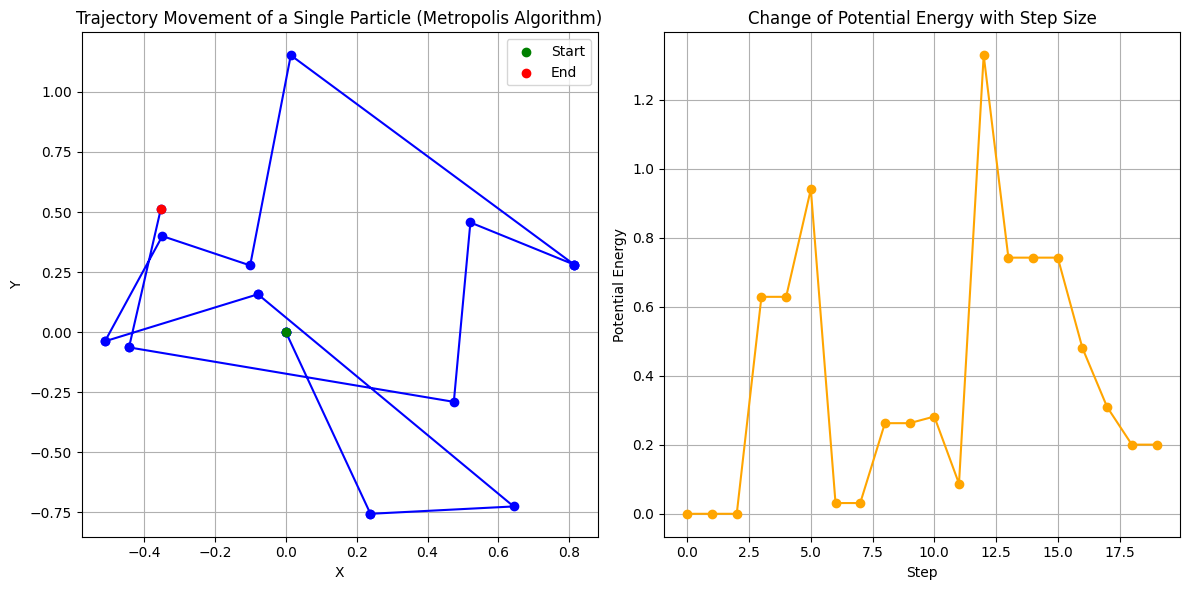

In [9]:
# Constants
N_steps = 20  # Number of steps
step_size = 1.0  # Step size for each move
temperature = 1.0  # Temperature parameter

# Initial position of the particle
x_current, y_current = 0.0, 0.0

# Lists to store trajectory points
x_trajectory = [x_current]
y_trajectory = [y_current]

# Lists to store potential energy values
energy_values = []

# Define a function to calculate the energy
def calculate_energy(x, y):
    return x**2 + y**2  # Example energy function (harmonic oscillator potential)

# Metropolis algorithm
for step in range(N_steps):
    # Generate a trial move
    x_trial = x_current + np.random.uniform(-step_size, step_size)
    y_trial = y_current + np.random.uniform(-step_size, step_size)

    # Calculate energy differences
    current_energy = calculate_energy(x_current, y_current)
    trial_energy = calculate_energy(x_trial, y_trial)
    delta_E = trial_energy - current_energy

    # Accept or reject the move based on the Metropolis criterion
    if delta_E <= 0 or np.random.uniform(0, 1) < np.exp(-delta_E / temperature):
        x_current, y_current = x_trial, y_trial

    # Append current position to the trajectory
    x_trajectory.append(x_current)
    y_trajectory.append(y_current)
    energy_values.append(current_energy)

# Plot trajectory movement
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_trajectory, y_trajectory, marker='o', linestyle='-', color='b')
plt.scatter(x_trajectory[0], y_trajectory[0], color='g', label='Start',zorder=3)
plt.scatter(x_trajectory[-1], y_trajectory[-1], color='r', label='End',zorder=3)
plt.title('Trajectory Movement of a Single Particle (Metropolis Algorithm)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(energy_values, marker='o', linestyle='-', color='orange')
plt.title('Change of Potential Energy with Step Size')
plt.xlabel('Step')
plt.ylabel('Potential Energy')
plt.grid(True)

plt.tight_layout()
plt.show()